In [157]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexzieky/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/alexzieky/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alexzieky/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [143]:
stopwords=set(stopwords.words("english"))

In [158]:
df = pd.read_csv('twitter.csv')

In [159]:
df=pd.read_csv('twitter.csv')
df.tweet_text=df.tweet_text.map(lambda x: str(x))
df = df[df.is_there_an_emotion_directed_at_a_brand_or_product != 'No emotion toward brand or product']  
df = df[df.is_there_an_emotion_directed_at_a_brand_or_product != "I can't tell"]
df=df.replace('Negative emotion', 0)
df=df.replace('Positive emotion', 1)
df.is_there_an_emotion_directed_at_a_brand_or_product=pd.to_numeric(df.is_there_an_emotion_directed_at_a_brand_or_product)

df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1


In [160]:
df.columns = ['tweet', 'directed_at', 'emotion']

In [161]:
df.shape

(3548, 3)

In [162]:
df.emotion.value_counts()

1    2978
0     570
Name: emotion, dtype: int64

In [163]:
df.directed_at.fillna("Not Sure", inplace = True) 
df.dropna(inplace = True)

In [164]:
df.isnull().sum()

tweet          0
directed_at    0
emotion        0
dtype: int64

In [165]:
df

,tweet,directed_at,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1
...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,1
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,1
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,0
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,1


In [140]:
df.tweet[1]

"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW"

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

text_counts= cv.fit_transform(df['tweet'])


In [113]:
text_counts

<3548x5752 sparse matrix of type '<class 'numpy.int64'>'
	with 41470 stored elements in Compressed Sparse Row format>

In [114]:
type(text_counts)

scipy.sparse.csr.csr_matrix

In [115]:
pd.DataFrame(text_counts)

,0
0,"(0, 5558)\t1\n (0, 94)\t1\n (0, 2728)\t1\n..."
1,"(0, 2728)\t1\n (0, 4922)\t1\n (0, 2781)\t1..."
2,"(0, 4922)\t1\n (0, 2719)\t1\n (0, 4913)\t1..."
3,"(0, 2728)\t1\n (0, 4922)\t2\n (0, 363)\t1\..."
4,"(0, 4922)\t1\n (0, 4950)\t1\n (0, 2259)\t1..."
...,...
3543,"(0, 2728)\t1\n (0, 4922)\t1\n (0, 2259)\t1..."
3544,"(0, 4922)\t1\n (0, 2719)\t1\n (0, 3462)\t1..."
3545,"(0, 4922)\t1\n (0, 2221)\t1\n (0, 4046)\t2..."
3546,"(0, 2728)\t1\n (0, 4922)\t1\n (0, 2719)\t1..."


In [116]:
df_text_counts = pd.DataFrame(text_counts.todense(),columns = cv.get_feature_names())
df_text_counts

,0,000,02,03,0310apple,08,1,10,100,100s,...,zimride,zing,zip,zite,zms,zombies,zomg,zone,zoom,zzzs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words = stopwords,tokenizer = token.tokenize)
text_tf= tf.fit_transform(df['tweet'])
text_tf.data

array([0.04199928, 0.33889155, 0.31745537, ..., 0.28261395, 0.2976229 ,
       0.14085213])

In [118]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 

def fn_tdm_df(docs, xColNames = None, **kwargs):
    ''' create a term document matrix as pandas DataFrame
    with **kwargs you can pass arguments of CountVectorizer
    if xColNames is given the dataframe gets columns Names'''

    #initialize the  vectorizer
    vectorizer = CountVectorizer(**kwargs,stop_words = stopwords,tokenizer = token.tokenize)
    x1 = vectorizer.fit_transform(docs)
    #create dataFrame
    df = pd.DataFrame(x1.toarray().transpose(), index = vectorizer.get_feature_names())

    if xColNames is not None:
        df.columns = xColNames

    return df



In [119]:
fn_tdm_df(df['tweet']).T

,0,000,02,03,0310apple,08,1,10,100,100s,...,zimride,zing,zip,zite,zms,zombies,zomg,zone,zoom,zzzs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1. Exploratory Data Analysis

In [182]:
data = df['tweet']
target = df['emotion']

In [183]:
import string, re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [184]:
## setting stopwords and punctuations
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©',
            'said', 'one', 'com', 'satirewire', '-', '–', '—', 'satirewire.com']
sw_set = set(sw_list)

In [185]:
# we can define a function that removes stopwords 
def process_article(article):
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed 

In [186]:
# applying the above function to our data/features 
processed_data = list(map(process_article, data))

In [187]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

6332

In [188]:
# creating a list with all lemmatized outputs
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [189]:
X_lem = lemmatized_output
# [' '.join(d) for d in processed_data]

y_lem = target
# X[3]

In [190]:
# train test split the lemmatized words
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)
tfidf = TfidfVectorizer(ngram_range=(1,2), stop_words=sw_list)

tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

tfidf_data_train_lem

<2838x21975 sparse matrix of type '<class 'numpy.float64'>'
	with 64810 stored elements in Compressed Sparse Row format>

In [191]:
# get a quick look of the non zero elements

non_zero_cols = tfidf_data_train.nnz / float(tfidf_data_train.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 23.452078928823116
Percentage of columns containing ZERO: 0.9989764727914798


In [193]:
df_freq_positive = df[df['emotion']==1]
df_freq_negative = df[df['emotion']==0]

In [197]:
data_positive = df_freq_positive['tweet']
data_negative = df_freq_negative['tweet']

In [198]:
pros_positive = list(map(process_article, data_positive))
pros_negative = list(map(process_article, data_negative))

In [199]:
total_vocab_positive = set()
for comment in pros_positive:
    total_vocab_positive.update(comment)
len(total_vocab_positive)

5408

In [200]:
total_vocab_negative = set()
for comment in pros_negative:
    total_vocab_negative.update(comment)
len(total_vocab_negative)

2131

In [201]:
print(pros_positive[:2])

[['jessedee', 'know', 'fludapp', 'awesome', 'ipad/iphone', 'app', "'ll", 'likely', 'appreciate', 'design', 'also', "'re", 'giving', 'free', 'ts', 'sxsw'], ['swonderlin', 'wait', 'ipad', '2', 'also', 'sale', 'sxsw']]


In [202]:
flat_positive = [item for sublist in pros_positive for item in sublist]
flat_negative = [item for sublist in pros_negative for item in sublist]

In [203]:
positive_freq = FreqDist(flat_positive)
negative_freq = FreqDist(flat_negative)

In [204]:
# Top 20 satire words:

positive_freq.most_common(20)

[('sxsw', 3103),
 ('mention', 2194),
 ('link', 1217),
 ('ipad', 1002),
 ('rt', 937),
 ('apple', 924),
 ('google', 716),
 ('store', 542),
 ('iphone', 523),
 ("'s", 493),
 ('2', 490),
 ('quot', 464),
 ('app', 396),
 ('new', 359),
 ('austin', 294),
 ('amp', 211),
 ('ipad2', 209),
 ('android', 198),
 ('launch', 160),
 ('get', 157)]

In [205]:
# Top 20 non-satire words:

negative_freq.most_common(20)

[('sxsw', 581),
 ('mention', 313),
 ('ipad', 188),
 ('quot', 175),
 ('iphone', 161),
 ('google', 145),
 ('rt', 137),
 ('apple', 120),
 ('link', 102),
 ("n't", 87),
 ("'s", 77),
 ('2', 64),
 ('app', 60),
 ('store', 46),
 ('new', 43),
 ('like', 39),
 ('circles', 34),
 ('social', 31),
 ('apps', 30),
 ('people', 29)]

#### Normalized word frequencies:

In [207]:
positive_total_word_count = sum(positive_freq.values())
positive_top_25 = positive_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in positive_top_25:
    normalized_frequency = word[1]/positive_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

sxsw 		 0.08141
mention 		 0.05756
link 		 0.03193
ipad 		 0.02629
rt 		 0.02458
apple 		 0.02424
google 		 0.01878
store 		 0.01422
iphone 		 0.01372
's 		 0.01293
2 		 0.01286
quot 		 0.01217
app 		 0.01039
new 		 0.009419
austin 		 0.007713
amp 		 0.005536
ipad2 		 0.005483
android 		 0.005195
launch 		 0.004198
get 		 0.004119
n't 		 0.003988
pop-up 		 0.003962
great 		 0.003594
party 		 0.003463
line 		 0.003411


In [209]:
negative_total_word_count = sum(negative_freq.values())
negative_top_25 = negative_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in negative_top_25:
    normalized_frequency = word[1]/negative_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

sxsw 		 0.07951
mention 		 0.04284
ipad 		 0.02573
quot 		 0.02395
iphone 		 0.02203
google 		 0.01984
rt 		 0.01875
apple 		 0.01642
link 		 0.01396
n't 		 0.01191
's 		 0.01054
2 		 0.008759
app 		 0.008211
store 		 0.006295
new 		 0.005885
like 		 0.005337
circles 		 0.004653
social 		 0.004243
apps 		 0.004106
people 		 0.003969
design 		 0.003832
need 		 0.003421
android 		 0.003285
austin 		 0.003285
get 		 0.003285


#### Let's visualize it!

In [210]:
# create counts of satire and not satire with values and words
positive_bar_counts = [x[1] for x in positive_freq.most_common(25)]
positive_bar_words = [x[0] for x in positive_freq.most_common(25)]

negative_bar_counts = [x[1] for x in negative_freq.most_common(25)]
negative_bar_words = [x[0] for x in negative_freq.most_common(25)]

In [211]:
# set the color of our bar graphs
color = cm.viridis_r(np.linspace(.4,.8, 30))

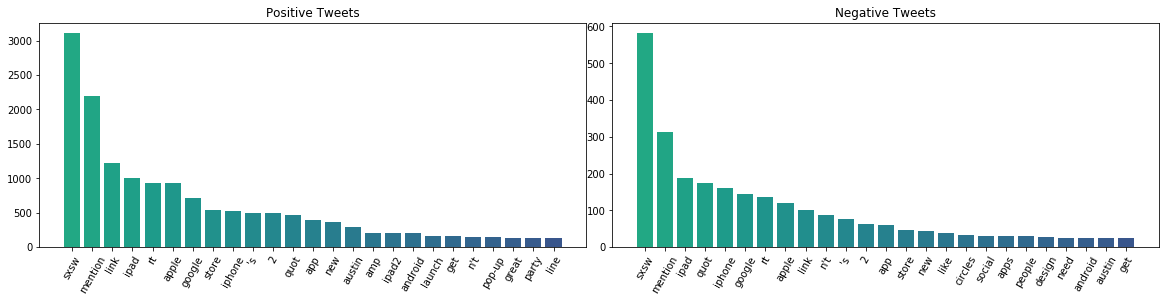

In [212]:
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

# Generate a line plot on first axes
ax.bar(positive_bar_words, positive_bar_counts, color=color)
# ax.plot(colormap='PRGn')

# Draw a scatter plot on 2nd axes
ax2.bar(negative_bar_words, negative_bar_counts, color=color )

ax.title.set_text('Positive Tweets')
ax2.title.set_text('Negative Tweets')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

# plt.savefig('word count bar graphs.png')

plt.show()

#### Word Clouds

In [213]:
# Getting our data into a dictionary
#FORMAT:  dictionary = dict(zip(keys, values))
!pip install wordcloud
from wordcloud import WordCloud
positive_dictionary = dict(zip(positive_bar_words, positive_bar_counts))
negative_dictionary = dict(zip(negative_bar_words, negative_bar_counts))

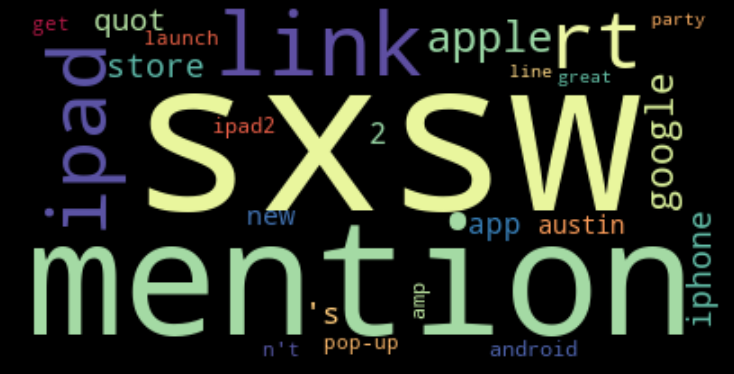

In [214]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(positive_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

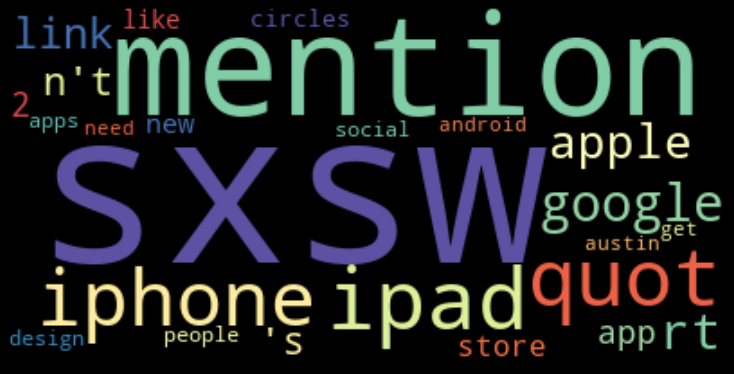

In [215]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(negative_dictionary)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('not_satire_wordcloud.png')

plt.show()